In [23]:
%matplotlib inline
import glob, os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
directory = '/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed'
os.chdir(directory)

In [24]:
gendf1 = pd.DataFrame
contentlist = []
for path in glob.glob("Generation/generationdata_*.csv"):
    df = pd.read_csv(path,index_col=None, header=0)
    contentlist.append(df)
    gendf1 = pd.concat(contentlist)

middf = gendf1[(gendf1.Generation ==4)]
middf = middf[middf.Generation_Time <100]

In [25]:
gendf =  pd.DataFrame
contentlist = []
for path in glob.glob("MiddleGeneration/middlegenerationdata_*.csv"):
    df = pd.read_csv(path,index_col=None, header=0)
    contentlist.append(df)
    gendf = pd.concat(contentlist)


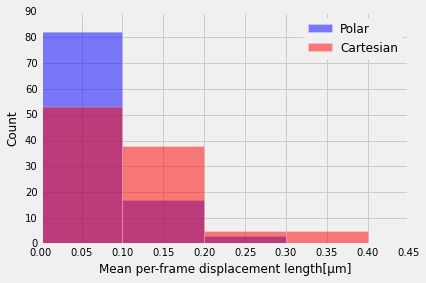

In [29]:
ax1= gendf.Mean_Polar_Displacement.hist(color = 'blue', label = 'Polar', alpha= 0.5,bins=np.arange(0, 0.5,0.1))
ax1.set_xlabel('Mean per-frame displacement length[µm]')
ax1.set_ylabel('Count')
gendf.Mean_Cartesian_Displacement.hist(bins=np.arange(0,0.5,0.1),color='red',label = 'Cartesian', alpha=0.5, ax=ax1)
ax1.legend(loc='upper right')
#ax.set_title('Distribution of Elongation Rate')
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/GenDisplacementHistogram.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


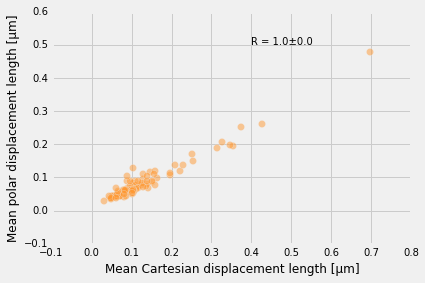

In [37]:
ax = gendf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Mean_Polar_Displacement',alpha=0.5, color = '#ff9933', s =50)
corr = gendf.Mean_Cartesian_Displacement.corr(gendf.Mean_Polar_Displacement)
corrstder = ((1-(gendf.Mean_Cartesian_Displacement.corr(gendf.Mean_Polar_Displacement))**2)/len(gendf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.4,0.5))
ax.set_ylabel('Mean polar displacement length [µm]')
ax.set_xlabel('Mean Cartesian displacement length [µm]')
#for i, txt in enumerate(lindf.ID):
 #   ax.annotate(txt, (lindf.Mean_Cartesian_Displacement.iloc[i],lindf.Mean_Polar_Displacement.iloc[i]))

axes = plt.gca()
#axes.set_ylim([0.006,0.012])
#axes.set_xlim([0.004,0.015])
plt.tight_layout()

plt.savefig(directory+'/Graphs/Total_Analysis/Gen-MeanPolar-LineageMeanCart-Scatter.pdf')

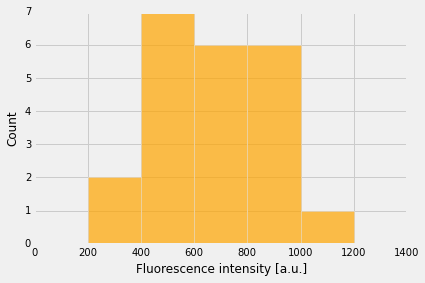

In [19]:
gen1df = gendf1[(gendf1.Generation ==1)]
ax = gen1df.Fluorescence_Intensity.hist( color='Orange', bins = [0,200,400,600,800,1000,1200,1400],alpha=0.7)
ax.set_xlabel('Fluorescence intensity [a.u.]')
ax.set_ylabel("Count")
plt.tight_layout()
#ax.grid(False)
plt.savefig(directory+'/Graphs/Total_Analysis/FluorescenceHistogram.pdf')

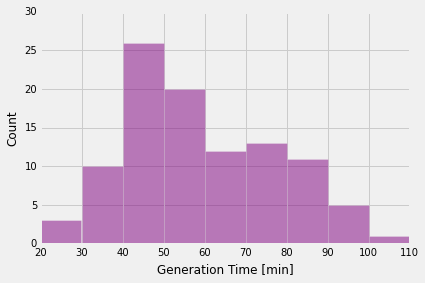

In [20]:
ax= gendf.Generation_Time.hist(color = 'purple', alpha= 0.5, bins=np.arange(20,120,10))
ax.set_xlabel('Generation Time [min]')
ax.set_ylabel('Count')
#ax.grid(False)
#ax.set_title('Distribution of Elongation Rate')
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/GTHistogram.pdf')

In [21]:
gendf.Generation_Time.mean()

59.85294117647059

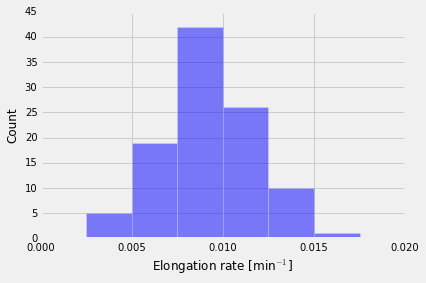

In [8]:
ax= gendf.Elongation_Rate.hist(color = 'blue', alpha= 0.5,bins=[0, 0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02])
ax.set_xlabel(r'Elongation rate [min$^{-1}$]')
ax.set_ylabel('Count')
#ax.grid(False)
#ax.set_title('Distribution of Elongation Rate')
axes = plt.gca()
axes.set_xlim([0.00,0.02])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/ERHistogram.pdf')

In [9]:
gendf['Polar_Displacements_Over_04'].fillna(0, inplace=True)
gendf[gendf['Polar_Displacements_Over_04']==gendf['Polar_Displacements_Over_04'].max()]

,Generation,Generation_Time,Elongation_Rate,Fluorescence_Intensity,Max_Cartesian_Displacement,Mean_Cartesian_Displacement,CV_Cartesian_Displacement,Total_Cartesian_Displacement,Mean_Polar_Displacement,Max_Polar_Displacement,CV_Polar_Displacement,Polar_Displacements_Over_04,Foci_ID,Radius_Gyration
4,6,99,0.004909,273,2.650032,0.69742,0.727424,69.044604,0.477375,1.87458,0.946034,43,pos5D,0.54647


In [22]:
print('Total Generations: '+ str(len(gendf)))
print('Number of 3rd and 4th Generations: '+ str(len(middf)))

Total Generations: 102
Number of 3rd and 4th Generations: 22


/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


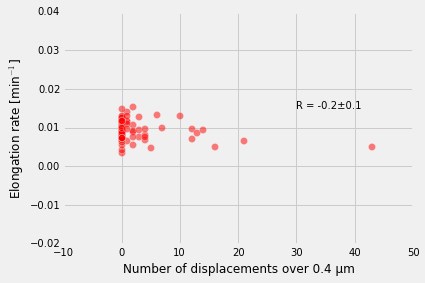

In [11]:
ax = gendf.plot(kind='scatter', x = 'Polar_Displacements_Over_04', y = 'Elongation_Rate',alpha=0.5, color = 'red', s =50)
corr = gendf.Elongation_Rate.corr(gendf.Polar_Displacements_Over_04)
corrstder = ((1-(gendf.Elongation_Rate.corr(gendf.Polar_Displacements_Over_04))**2)/len(gendf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (30,0.015))
ax.set_ylabel(r'Elongation rate [min$^{-1}$]')
ax.set_xlabel('Number of displacements over 0.4 µm')
axes = plt.gca()
#axes.set_ylim([0.00,0.02])
#axes.set_xlim([0.00,3])
plt.tight_layout()

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


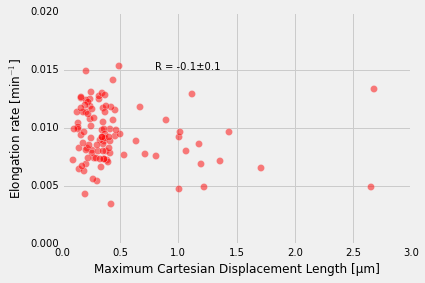

In [191]:
ax = gendf.plot(kind='scatter', x = 'Max_Cartesian_Displacement', y = 'Elongation_Rate',alpha=0.5, s =50,color = 'red')
corr = gendf.Elongation_Rate.corr(gendf.Max_Cartesian_Displacement)
corrstder = ((1-(gendf.Elongation_Rate.corr(gendf.Max_Cartesian_Displacement))**2)/len(gendf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.8,0.015))
ax.set_ylabel(r'Elongation rate [min$^{-1}$]')
ax.set_xlabel('Maximum Cartesian Displacement Length [µm]')
axes = plt.gca()
axes.set_ylim([0.00,0.02])
axes.set_xlim([0.00,3])
plt.tight_layout()

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


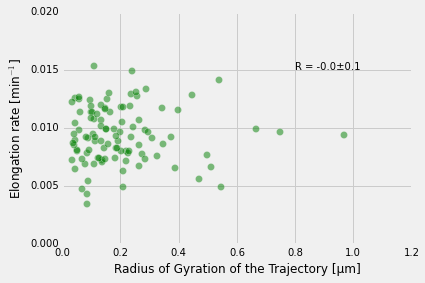

In [12]:
ax = gendf.plot(kind='scatter', x = 'Radius_Gyration', y = 'Elongation_Rate',alpha=0.5, s =50,color = 'green')
corr = gendf.Elongation_Rate.corr(gendf.Radius_Gyration)
corrstder = ((1-(gendf.Elongation_Rate.corr(gendf.Radius_Gyration))**2)/len(gendf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.8,0.015))
ax.set_ylabel(r'Elongation rate [min$^{-1}$]')
ax.set_xlabel('Radius of Gyration of the Trajectory [µm]')
axes = plt.gca()
axes.set_ylim([0.00,0.02])
axes.set_xlim([0.00,1.2])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/ER-RadGyr-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


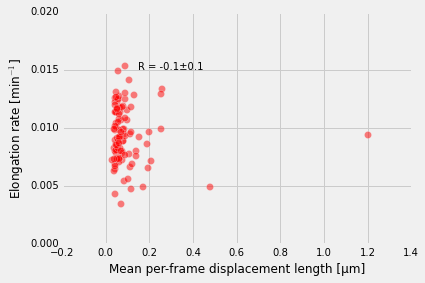

In [13]:
ax = gendf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Elongation_Rate',alpha=0.5, s =50,color = 'red')
corr = gendf.Elongation_Rate.corr(gendf.Mean_Polar_Displacement)
corrstder = ((1-(gendf.Elongation_Rate.corr(gendf.Mean_Polar_Displacement))**2)/len(gendf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (0.15,0.015))
ax.set_ylabel(r'Elongation rate [min$^{-1}$]')
ax.set_xlabel('Mean per-frame displacement length [µm]')
axes = plt.gca()
axes.set_ylim([0.00,0.02])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/ER-Meandisp-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


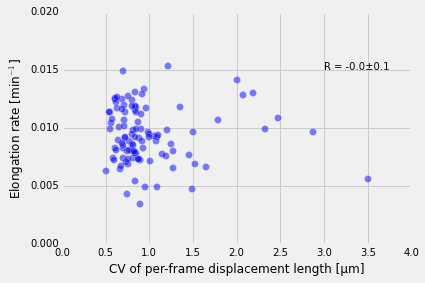

In [239]:
ax = gendf.plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Elongation_Rate',alpha=0.5,s =50, color = 'blue')
corr = gendf.Elongation_Rate.corr(gendf.CV_Polar_Displacement)
corrstder = ((1-(gendf.Elongation_Rate.corr(gendf.CV_Polar_Displacement))**2)/len(gendf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (3,0.015))
ax.set_ylabel(r'Elongation rate [min$^{-1}$]')
ax.set_xlabel('CV of per-frame displacement length [µm]')
axes = plt.gca()
axes.set_ylim([0.00,0.02])
plt.tight_layout()
#plt.savefig(directory+'/Graphs/Total_Analysis/ER-CVdisp-Scatter.pdf')

In [89]:
gendf.head(3)

,Generation,Generation_Time,Elongation_Rate,Fluorescence_Intensity,Mean_Cartesian_Displacement,CV_Cartesian_Displacement,Mean_Polar_Displacement,CV_Polar_Displacement,Foci_ID
0,2,51,0.008894,594.8,0.121000,0.587214,0.068845,0.601311,pos0A
1,3,44,0.010625,594.8,0.123011,0.566110,0.074979,0.529548,pos0A
2,4,81,0.007998,594.8,0.114884,0.677359,0.062914,0.644218,pos0A


/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


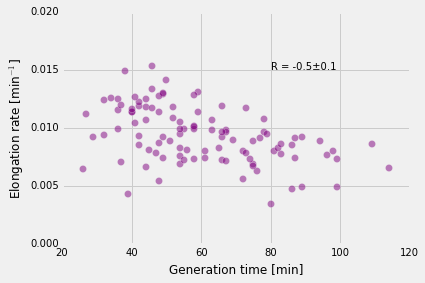

In [14]:
ax = gendf.plot(kind='scatter', x = 'Generation_Time', y = 'Elongation_Rate',alpha=0.5, s =50, color = 'purple')
corr = gendf.Elongation_Rate.corr(gendf.Generation_Time)
corrstder = ((1-(gendf.Elongation_Rate.corr(gendf.Generation_Time))**2)/len(gendf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder,  (80,0.015))
ax.set_ylabel(r'Elongation rate [min$^{-1}$]')
ax.set_xlabel('Generation time [min]')
axes = plt.gca()
axes.set_ylim([0.00,0.02])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/ER-GenTime-Scatter.pdf')

In [92]:
gendfdict = {}
gencorrdict = {}
gencorrdictcv = {}
gencorrstderdict = {}
gencorrstderdictcv = {}
for x in gendf.Generation[1:6]:
    gendfdict[x] =  gendf[(gendf.Generation ==x)]
    gencorrdict[x] = gendfdict[x].Elongation_Rate.corr(gendfdict[x].Mean_Cartesian_Displacement)
    gencorrdictcv[x] = gendfdict[x].Elongation_Rate.corr(gendfdict[x].CV_Cartesian_Displacement)
    gencorrstderdict[x] =  ((1-(gendfdict[x].Elongation_Rate.corr(gendfdict[x].Mean_Cartesian_Displacement))**2)/len(gendfdict[x]))**(0.5)
    gencorrstderdictcv[x] =  ((1-(gendfdict[x].Elongation_Rate.corr(gendfdict[x].CV_Cartesian_Displacement))**2)/len(gendfdict[x]))**(0.5)

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


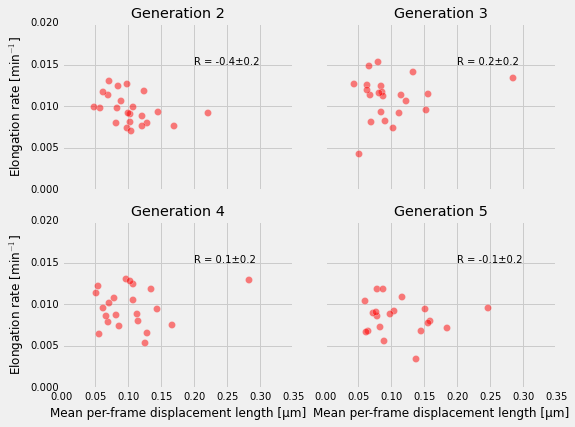

In [118]:
fig, axes = plt.subplots(sharex = True,sharey = True,  nrows=2, ncols=2)
plt.rcParams['font.size'] = 10

gendfdict[2].plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Elongation_Rate', title = 'Generation 2', alpha=0.5, s= 50, color = 'red', figsize=(8,6),ax=axes[0,0])
gendfdict[3].plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Elongation_Rate', title = 'Generation 3', alpha=0.5,s= 50, color = 'red',ax=axes[0,1])
gendfdict[4].plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Elongation_Rate', title = 'Generation 4', alpha=0.5,s= 50, color = 'red',ax=axes[1,0])
gendfdict[5].plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Elongation_Rate', title = 'Generation 5', alpha=0.5,s= 50, color = 'red',ax=axes[1,1])


axes[0,0].annotate('R = %.1f'%gencorrdict[2]+ '±%.1f'%gencorrstderdict[2], (0.2, 0.015))
axes[0,1].annotate('R = %.1f'%gencorrdict[3]+ '±%.1f'%gencorrstderdict[3], (0.2, 0.015))
axes[1,0].annotate('R = %.1f'%gencorrdict[4]+ '±%.1f'%gencorrstderdict[4], (0.2, 0.015))
axes[1,1].annotate('R = %.1f'%gencorrdict[5]+ '±%.1f'%gencorrstderdict[5], (0.2, 0.015))
plt.tight_layout()

axes[0,0].set_ylabel(r'Elongation rate [min$^{-1}$]')
axes[1,0].set_ylabel(r'Elongation rate [min$^{-1}$]')
axes[1,0].set_xlabel('Mean per-frame displacement length [µm]')
axes[1,1].set_xlabel('Mean per-frame displacement length [µm]')

axes = plt.gca()
axes.set_ylim([0.00,0.02])

plt.savefig(directory+'/Graphs/Total_Analysis/Gen-ER-MeanCart-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


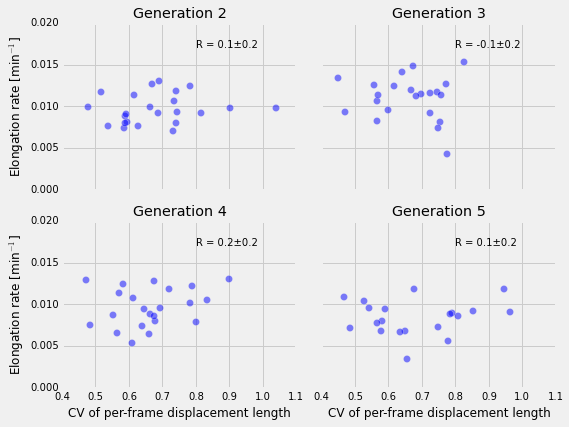

In [121]:
fig, axes = plt.subplots(sharex = True,sharey = True,  nrows=2, ncols=2)

gendfdict[2].plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Elongation_Rate', title = 'Generation 2', alpha=0.5,s= 50, color = 'blue', figsize=(8,6),ax=axes[0,0])
gendfdict[3].plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Elongation_Rate', title = 'Generation 3', alpha=0.5,s= 50, color = 'blue',ax=axes[0,1])
gendfdict[4].plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Elongation_Rate', title = 'Generation 4', alpha=0.5,s= 50, color = 'blue',ax=axes[1,0])
gendfdict[5].plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Elongation_Rate', title = 'Generation 5', alpha=0.5,s= 50, color = 'blue',ax=axes[1,1])

axes[0,0].annotate('R = %.1f'%gencorrdictcv[2]+ '±%.1f'%gencorrstderdictcv[2], (0.8, 0.017))
axes[0,1].annotate('R = %.1f'%gencorrdictcv[3]+ '±%.1f'%gencorrstderdictcv[3], (0.8, 0.017))
axes[1,0].annotate('R = %.1f'%gencorrdictcv[4]+ '±%.1f'%gencorrstderdictcv[4], (0.8, 0.017))
axes[1,1].annotate('R = %.1f'%gencorrdictcv[5]+ '±%.1f'%gencorrstderdictcv[5], (0.8, 0.017))

axes[0,0].set_ylabel(r'Elongation rate [min$^{-1}$]')
axes[1,0].set_ylabel(r'Elongation rate [min$^{-1}$]')
axes[1,0].set_xlabel('CV of per-frame displacement length')
axes[1,1].set_xlabel('CV of per-frame displacement length')
axes = plt.gca()
axes.set_ylim([0.00,0.02])
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Gen-ER-CVCart-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


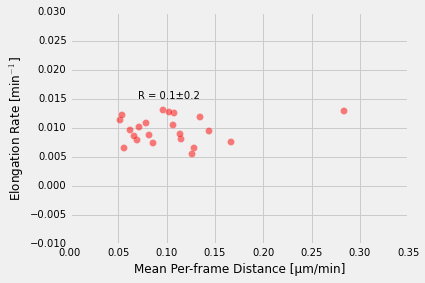

In [95]:
ax = middf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Elongation_Rate',s=50,alpha=0.5,color = 'red')
corr = middf.Elongation_Rate.corr(middf.Mean_Cartesian_Displacement)
corrstder = ((1-(middf.Elongation_Rate.corr(middf.Mean_Cartesian_Displacement))**2)/len(middf))**(0.5)
ax.annotate('R = %.1f'%corr+ '±%.1f'%corrstder, (0.07, 0.015))
ax.set_ylabel(r'Elongation Rate [min$^{-1}$]')
ax.set_xlabel('Mean Per-frame Distance [µm/min]')
#for i, txt in enumerate(middf.Generation_Time):
 #   ax.annotate(txt, (middf.Mean_Polar_Displacement.iloc[i],middf.Elongation_Rate.iloc[i]))
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Gen34-ER-MeanCart-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


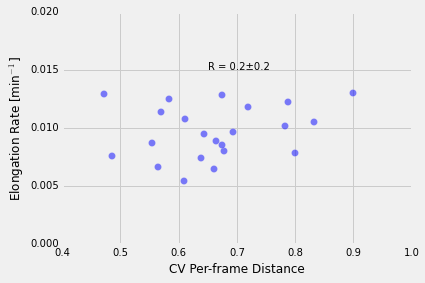

In [122]:
ax = middf.plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Elongation_Rate',alpha=0.5,s=50,color = 'blue')
corr = middf.Elongation_Rate.corr(middf.CV_Cartesian_Displacement)
corrstder = ((1-(middf.Elongation_Rate.corr(middf.CV_Cartesian_Displacement))**2)/len(middf))**(0.5)
ax.annotate('R = %.1f'%corr+ '±%.1f'%corrstder, (0.65, 0.015))
ax.set_ylabel(r'Elongation Rate [min$^{-1}$]')
ax.set_xlabel('CV Per-frame Distance')
#for i, txt in enumerate(middf.Generation_Time):
 #   ax.annotate(txt, (middf.Mean_Polar_Displacement.iloc[i],middf.Elongation_Rate.iloc[i]))
axes = plt.gca()
axes.set_ylim([0.00,0.02])
plt.tight_layout()
#plt.savefig(directory+'/Graphs/Total_Analysis/Gen34-ER-CVCart-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


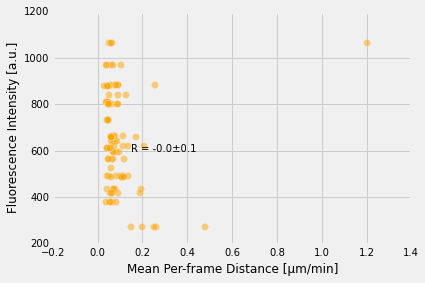

In [241]:
ax = gendf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Fluorescence_Intensity',alpha=0.5, color = 'orange', s =50)
corr = gendf.Fluorescence_Intensity.corr(gendf.Mean_Polar_Displacement)
corrstder = ((1-(gendf.Fluorescence_Intensity.corr(gendf.Mean_Polar_Displacement))**2)/len(gendf))**(0.5)
ax.annotate('R = %.1f'%corr+ '±%.1f'%corrstder, (0.15, 600))
ax.set_ylabel('Fluorescence Intensity [a.u.]')
ax.set_xlabel('Mean Per-frame Distance [µm/min]')
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Gen-Fluorescence-MeanPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


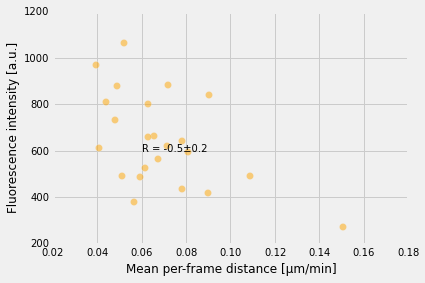

In [242]:
gen2df = gendf[(gendf.Generation ==2)]
ax = gen2df.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Fluorescence_Intensity',alpha=0.5, color = 'orange', s =50)
corr = gen2df.Fluorescence_Intensity.corr(gen2df.Mean_Polar_Displacement)
corrstder = ((1-(gen2df.Fluorescence_Intensity.corr(gen2df.Mean_Polar_Displacement))**2)/len(gen2df))**(0.5)
ax.annotate('R = %.1f'%corr+ '±%.1f'%corrstder, (0.06, 600))
ax.set_ylabel('Fluorescence intensity [a.u.]')
ax.set_xlabel('Mean per-frame distance [µm/min]')
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Gen2-Fluorescence-MeanPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


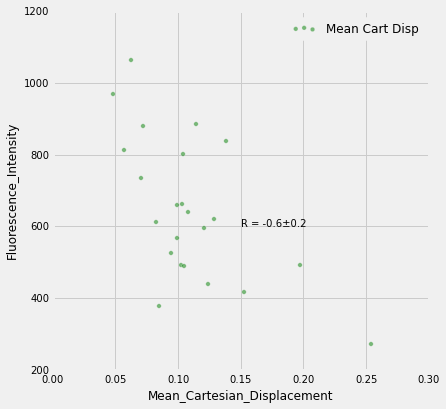

In [243]:
ax = gen2df.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Fluorescence_Intensity',alpha=0.5,label = 'Mean Cart Disp', color = 'green', figsize=(6,6))
corr = gen2df.Fluorescence_Intensity.corr(gen2df.Mean_Cartesian_Displacement)
corrstder =  ((1-(gen2df.Fluorescence_Intensity.corr(gen2df.Mean_Cartesian_Displacement))**2)/len(gen2df))**(0.5)
ax.annotate('R = %.1f'%corr+ '±%.1f'%corrstder, (0.15, 600))

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


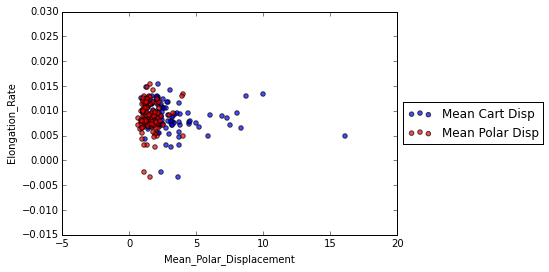

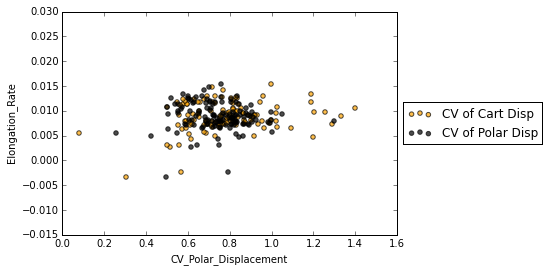

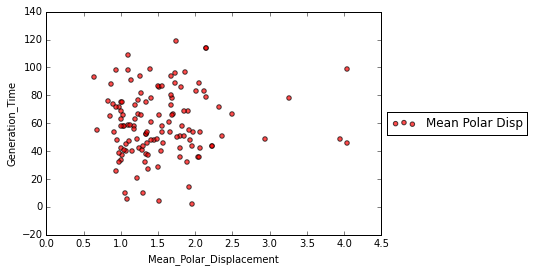

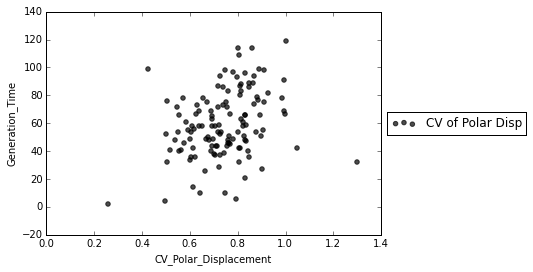

In [16]:
ax = gendf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Elongation_Rate', alpha=0.7,label = 'Mean Cart Disp',color='Blue')
gendf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Elongation_Rate',alpha=0.7,label = 'Mean Polar Disp', color='Red', ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2= gendf.plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Elongation_Rate', alpha=0.7,label = 'CV of Cart Disp', color='Orange')
gendf.plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Elongation_Rate', alpha=0.7,label = 'CV of Polar Disp', color='Black',ax=ax2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax3=gendf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Generation_Time',alpha=0.7,label = 'Mean Polar Disp', color='Red')
#gendf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Generation_Time', alpha=0.7,label = 'Mean Cart Disp',color='Blue', ax=ax3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax4= gendf.plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Generation_Time', alpha=0.7,label = 'CV of Polar Disp', color='Black')
#gendf.plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Generation_Time', alpha=0.7,label = 'CV of Cart Disp', color='Orange',ax=ax4)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

LinAlgError: singular matrix

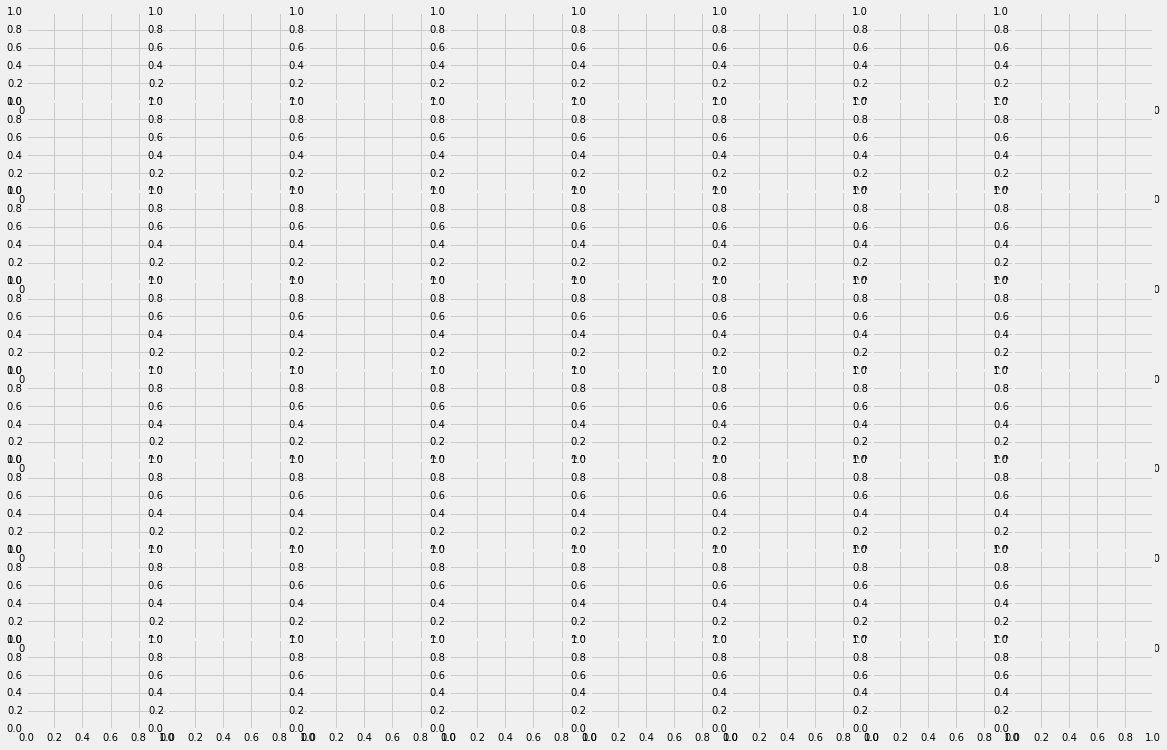

In [109]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(middf, alpha=0.2, figsize=(18, 12), diagonal='kde')